In [1]:
import torch
from utils import Args
from train import Training

# Evaluation procedure

#### Basic settings

In [2]:
datasets_paths = ["./datasets/shakespear_corpus.txt"]
out_dir = './runs/'
N = [16, 64, 128, 256]
B = [20, 64, 128, 256]
L = [4, 12, 18, 24]
h = [2, 4, 8]
d = [32, 128, 256, 768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1, 10, 20, 30]

args = Args(datasets_paths = ["./datasets/shakespear_corpus.txt"])
out_dir = './runs/'
N = [16, 64, 128, 256]
B = [20, 64, 128, 256]
L = [4, 12, 18, 24]
h = [4, 8, 12, 16]
d = [32, 128, 256, 768]
dff = (4 * torch.tensor(d)).tolist()
learning_rate = [1e-4, 1e-3, 1e-2, 1e-1]
use_lr_decay = [True, False]
max_iterations = [100, 1000, 5000, 10000]
n_epochs = [1, 10, 20, 30]

args = Args(
    N[0],B[0],L[0],h[0],d[0],
    use_lr_decay[0],learning_rate[0],
    datasets_paths[0],max_iterations[0],
    out_dir=out_dir, val_int=30, cross_val=True)

Args(batch_size=16, n_tokens=20, n_layers=4, n_heads=4, d_model=32, use_lr_decay=True, lr=0.0001, dataset_path='./datasets/shakespear_corpus.txt', max_iter=100, out_dir='./runs/', n_warm_iters=100, lr_decay_iter=5000, min_lr=0.0001, n_validation_batch=200, betas=(0.9, 0.99), n_epochs=10, val_int=30, save=True, save_int=200, name='milkshake', cross_val=True, k_fold=10)


#### Train models

In [ ]:
training = Training(args)
model, losses = training.train_model()
print(losses.keys())
print(losses['validation'])

#### Cross validation

In [3]:
training_cross = Training(args)
models, train_loss, val_loss = training_cross.cross_validation()

---------------------------------
Fold n°0
train indices: [0,0),[111538,1115381), test indices: [0,111538)
train indices: [0,0),[111538,1115381), test indices: [0,111538)
Epoch: 0, Batch index 0, Training Loss: 4.3832, Validation Loss: 4.4431
Epoch: 0, Batch index 30, Training Loss: 4.4017, Validation Loss: 4.3933
Epoch: 0, Batch index 60, Training Loss: 4.2663, Validation Loss: 4.2646
Epoch: 0, Batch index 90, Training Loss: 4.0933, Validation Loss: 4.0697
---------------------------------
Fold n°1
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
train indices: [0,111538),[223076,1115381), test indices: [111538,223076)
Epoch: 0, Batch index 0, Training Loss: 4.3724, Validation Loss: 4.3659
Epoch: 0, Batch index 30, Training Loss: 4.3072, Validation Loss: 4.3190
Epoch: 0, Batch index 60, Training Loss: 4.1969, Validation Loss: 4.2030
Epoch: 0, Batch index 90, Training Loss: 4.0532, Validation Loss: 4.0160
---------------------------------
Fold n°2
train indices

#### Results

In [ ]:
print(train_loss.size()) # 5 folds, 100 grad updates e.g. 5 x 100 matrix.
print(val_loss.size())   # 5 folds, log every 100 grad updates e.g. 5 x 1 matrix
print(val_loss)

In [ ]:
training_cross.losses_graph()

In [ ]:
training_cross.perplexity_graph()

### Loading from previous validation run

dict_keys(['k_fold_train_loss', 'k_fold_valid_loss', 'params'])
torch.Size([10, 201])


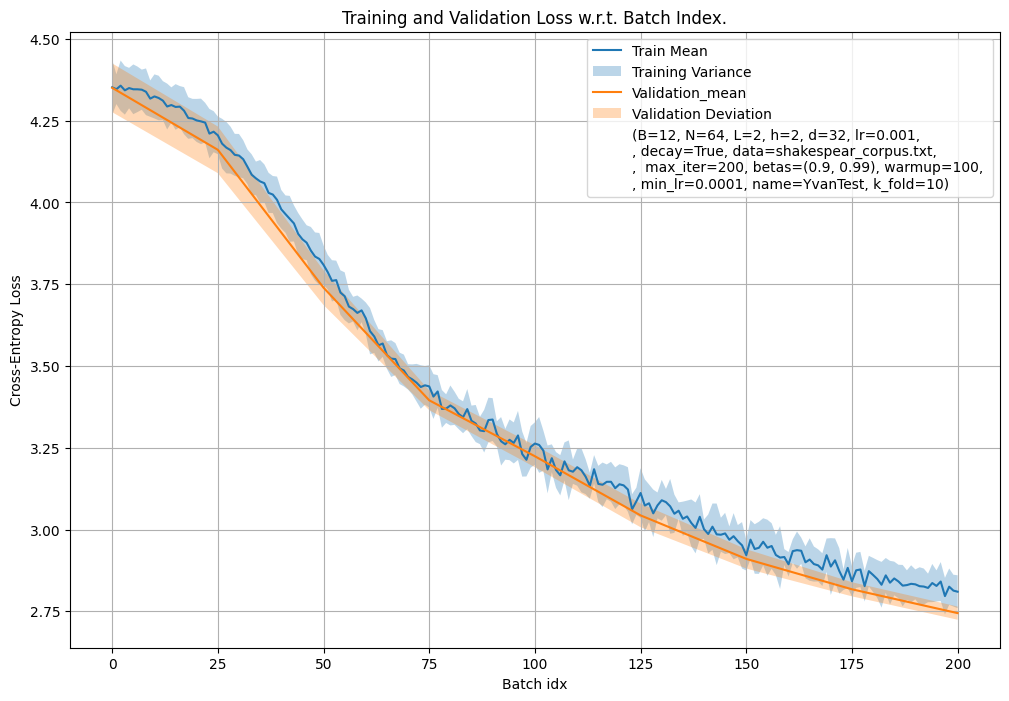

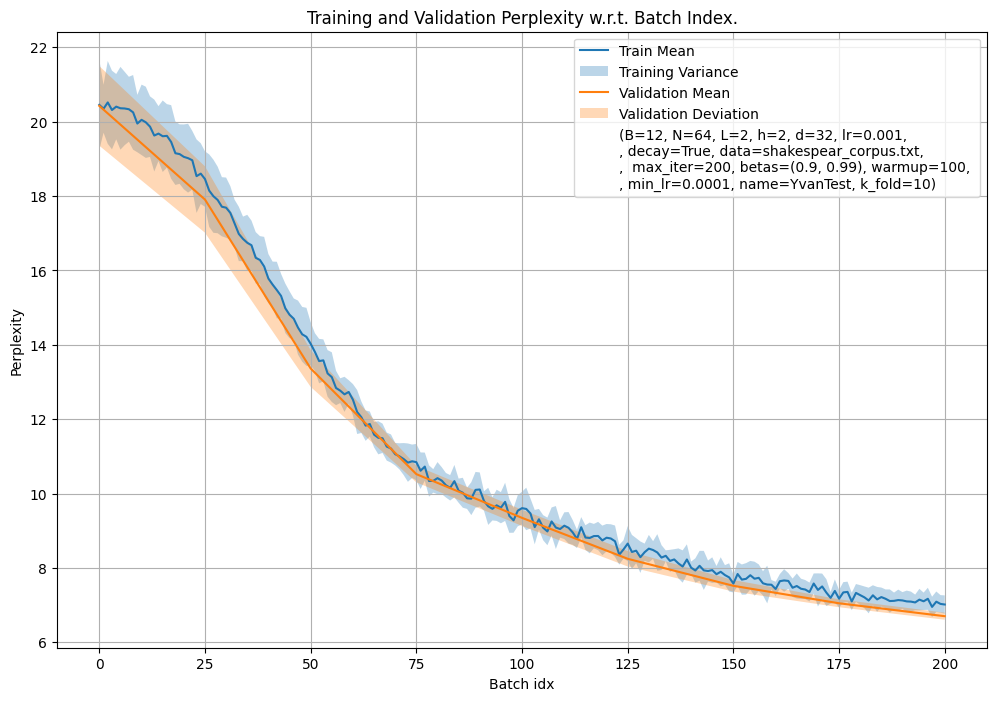

In [3]:
import torch
from utils import cv_losses_graph, perplexity_graph

cross_val_run = torch.load('./runs/YvanTest/total_cross_val_metrics.pt')   # load final recap file.
print(cross_val_run.keys())
print(cross_val_run['k_fold_train_loss'].size())
cv_losses_graph(
    cross_val_run ['k_fold_train_loss'], cross_val_run['k_fold_valid_loss'], 
    cross_val_run['params']['val_int'], './runs/YvanTest/', # save graph to same folder
    True, "chill_model", cross_val_run['params']          
)

perplexity_graph(
    cross_val_run ['k_fold_train_loss'], cross_val_run['k_fold_valid_loss'], 
    cross_val_run['params']['val_int'], './runs/YvanTest/', # save graph to same folder
    True, "chill_model", cross_val_run['params']          
)


In [ ]:
from utils import stringify_hyparams

print(stringify_hyparams(cross_val_run['params']))